In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import cPickle as pickle
import multiprocessing
import numpy as np
import numpy.fft as fft
import time
import os
import sys
sys.path.insert(1,'/Users/zyzdiana/Github/AC297r-Volume-Registration/code')

In [4]:
from utils import to_radian,res_to_rad,ax_to_w,rep_to_angle
from rotation_3d import tricubic_derivatives,tricubic_interp
from visualize import plot_cost_func
from cost_functions import cf_ssd
from Gauss_Newton import Gauss_Newton, axis_derivatives,print_results
from mask import sphere_mask

In [5]:
sept23_dict_10 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/sept23_dict_10.p','rb'))
sept23_dict_8 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/sept23_dict_8.p','rb'))
sept23_dict_6_4 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/sept23_dict_6_4.p','rb'))
oct13_dict_10 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_dict_10.p','rb'))
oct13_dict_8 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_dict_8.p','rb'))
oct13_dict_6_4 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_dict_6_4.p','rb'))

In [6]:
# Get All Axes of Rotations
path = '/Users/zyzdiana/Dropbox/THESIS/Sept_23_navs/'
ranges = ['0_5_to_2_5','3_0_to_5_0']
files = os.listdir(path)
axes_dict = {}
for f in files[1:]:
    rot_ax = f.split('_')[2]
    trans_ax = f.split('_')[10]
    if not axes_dict.has_key(rot_ax):
        axes_dict[rot_ax] = trans_ax
print axes_dict
print axes_dict.keys()

{'xz': 'xy', 'y': 'z', 'yz': 'xy', 'xy': 'xy', 'x': 'z', 'z': 'z'}
['xz', 'y', 'yz', 'xy', 'x', 'z']


In [7]:
def get_volume(res, rot_ax, rang_id, rot_angle):
    if('10' in res): dict_ = oct13_dict_10
    if('8' in res): dict_ = oct13_dict_8
    if('6_4' in res): dict_ = oct13_dict_6_4
    rad = res_to_rad(res)
    vol = dict_[rot_ax][axes_dict[rot_ax]][ranges[rang_id]][rot_angle]
    vol_filtered = abs(fft.ifftn(fft.ifftshift(sphere_mask(fft.fftshift(fft.fftn(vol)),rad))))
    return sphere_mask(vol_filtered,rad)

## Rotations Only

0 1 2 3 4 5 6 7 8 9 10 11 12 Converged in 12 iterations!


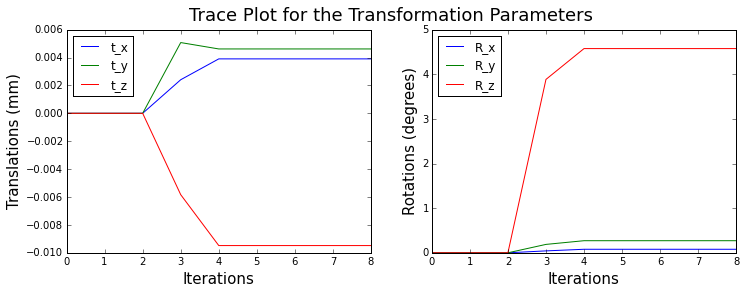

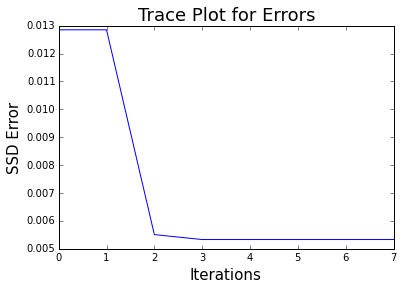

min error:  0.00533224432334
parameters at min error:  [ 0.00048761  0.00057666 -0.00118517  0.00138087  0.00472927  0.07984273]
translation (in mm): [ 0.00390088  0.00461327 -0.00948139]
rotations (in degrees): [ 0.07911808  0.27096745  4.5746512 ]


In [25]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'z'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(0.0, 0)],rad)
testVol2 = oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 0)]

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs, mask=True)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 Converged in 14 iterations!


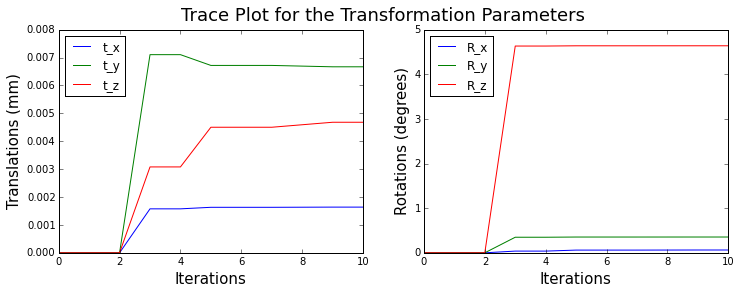

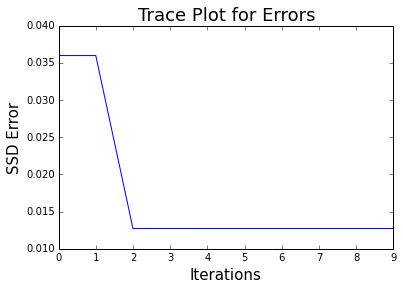

min error:  0.012723146137
parameters at min error:  [ 0.00025587  0.00104168  0.0007311   0.0010941   0.00617172  0.08094159]
translation (in mm): [ 0.00163755  0.00666672  0.00467905]
rotations (in degrees): [ 0.06268759  0.35361355  4.63761166]


In [26]:
# Calculate the radius for masking
res = '6_4'
rad = res_to_rad(res)
rot_ax = 'z'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_6_4[rot_ax][axes_dict[rot_ax]][ranges[1]][(0.0, 0)],rad)
testVol2 = oct13_dict_6_4[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 0)]

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs,divide_factor=float(rad), mask=True)
print_results(errors, Ps, 6.4)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 Converged in 14 iterations!


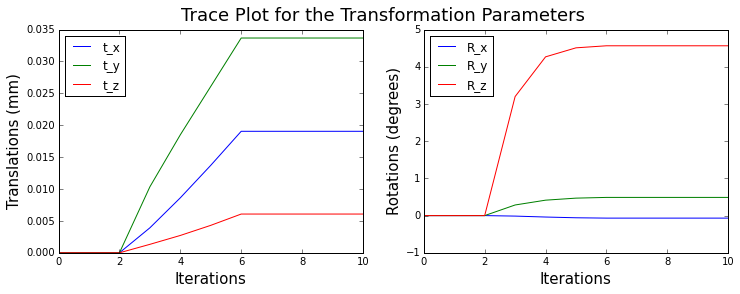

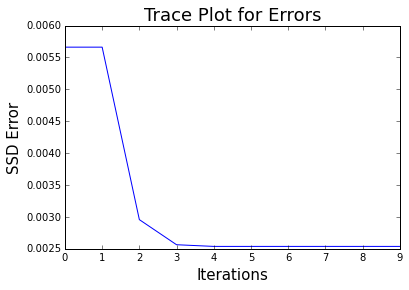

min error:  0.00253755392635
parameters at min error:  [ 0.00190524  0.00336798  0.00060766 -0.00118102  0.00853507  0.07967428]
translation (in mm): [ 0.01905237  0.03367977  0.00607659]
rotations (in degrees): [-0.06766749  0.48902372  4.5650001 ]


In [27]:
# Calculate the radius for masking
res = '10'
rad = res_to_rad(res)
rot_ax = 'z'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_10[rot_ax][axes_dict[rot_ax]][ranges[1]][(0.0, 0)],rad)
testVol2 = oct13_dict_10[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 0)]

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs,divide_factor=float(rad),mask=True)
print_results(errors, Ps, 10)

0 1 2 3 4 5 6 7 8 9 10 Converged in 10 iterations!


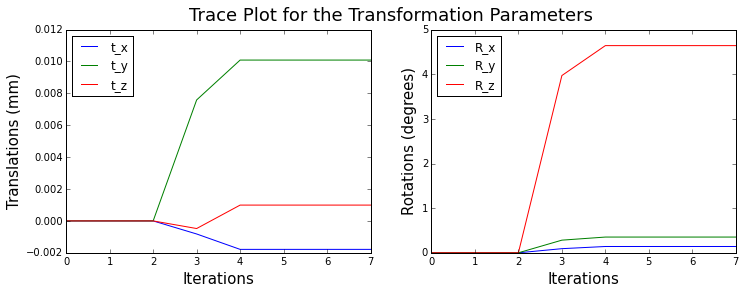

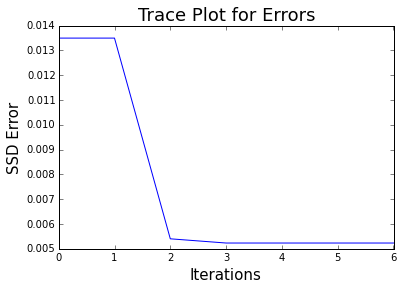

min error:  0.00523294653284
parameters at min error:  [-0.00022315  0.00126111  0.00012407  0.00246585  0.00615518  0.08100425]
translation (in mm): [-0.00178517  0.01008889  0.00099254]
rotations (in degrees): [ 0.14128284  0.35266559  4.64120141]


In [28]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'z'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(0.0, 5)],rad)
testVol2 = oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 5)]

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs, mask=True)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 Converged in 12 iterations!


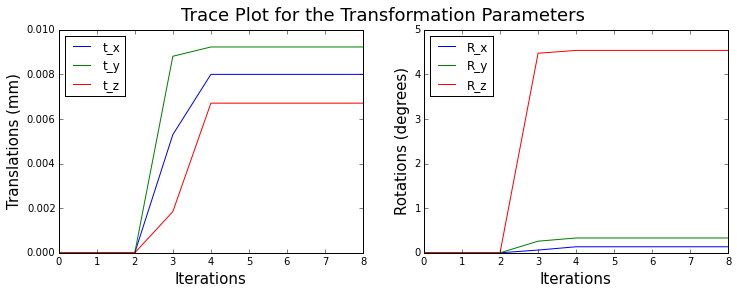

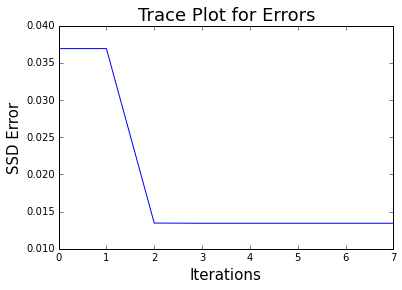

min error:  0.0134311197314
parameters at min error:  [ 0.00124913  0.00144085  0.00104754  0.00235832  0.00579145  0.07913315]
translation (in mm): [ 0.00799445  0.00922142  0.00670426]
rotations (in degrees): [ 0.1351219   0.33182546  4.53399564]


In [29]:
# Calculate the radius for masking
res = '6_4'
rad = res_to_rad(res)
rot_ax = 'z'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_6_4[rot_ax][axes_dict[rot_ax]][ranges[1]][(0.0, 5)],rad)
testVol2 = oct13_dict_6_4[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 5)]

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs,divide_factor=float(rad),mask=True)
print_results(errors, Ps, 6.4)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 Converged in 13 iterations!


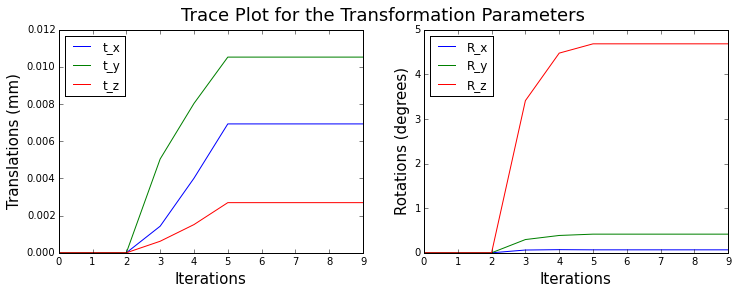

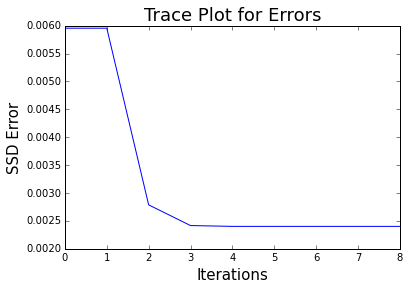

min error:  0.00240192903571
parameters at min error:  [ 0.00069296  0.00105212  0.00026965  0.00115818  0.00729224  0.08170332]
translation (in mm): [ 0.00692958  0.01052123  0.00269648]
rotations (in degrees): [ 0.06635883  0.41781464  4.68125547]


In [30]:
# Calculate the radius for masking
res = '10'
rad = res_to_rad(res)
rot_ax = 'z'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_10[rot_ax][axes_dict[rot_ax]][ranges[1]][(0.0, 5)],rad)
testVol2 = oct13_dict_10[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 5)]

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs,divide_factor=float(rad),mask=True)
print_results(errors, Ps, 10)

0 1 2 3 4 5 6 7 8 9 10 11 12 Converged in 12 iterations!


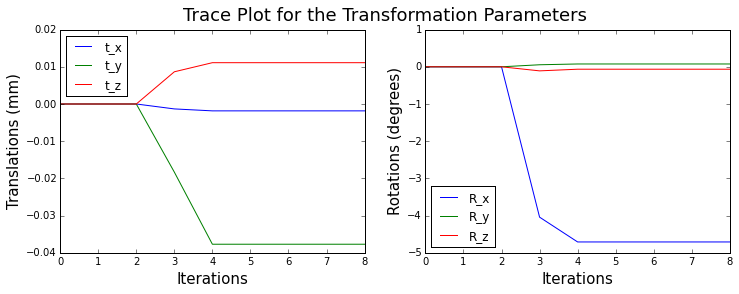

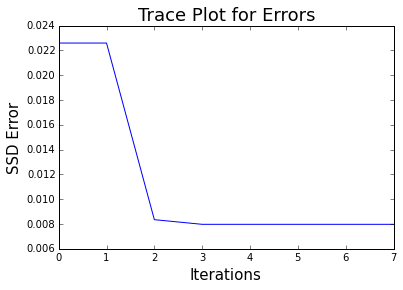

min error:  0.00797424866684
parameters at min error:  [-0.00023068 -0.00471187  0.00138814 -0.08217763  0.00132389 -0.00113361]
translation (in mm): [-0.00184541 -0.03769498  0.01110512]
rotations (in degrees): [-4.70843111  0.07585349 -0.06495131]


In [31]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'x'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(0.0, 0)],rad)
testVol2 = oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 0)]

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs,mask=True)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 Converged in 12 iterations!


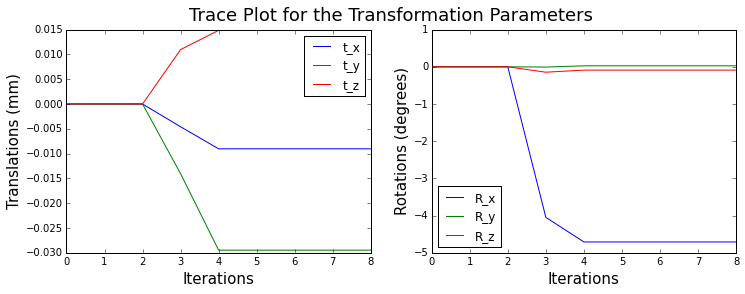

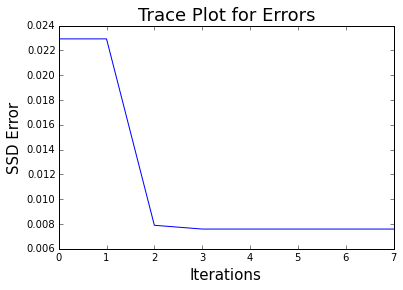

min error:  0.00759232768005
parameters at min error:  [-0.00112951 -0.0036835   0.00185583 -0.08217371  0.00046473 -0.00155885]
translation (in mm): [-0.00903605 -0.02946797  0.01484668]
rotations (in degrees): [-4.70820688  0.02662734 -0.0893154 ]


In [32]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'x'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(0.0, 5)],rad)
testVol2 = oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 5)]

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs,mask=True)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 Converged in 12 iterations!


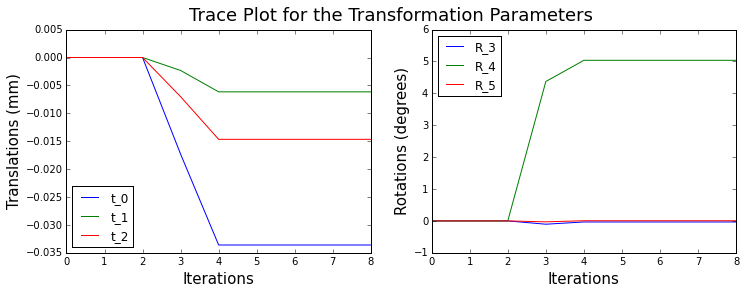

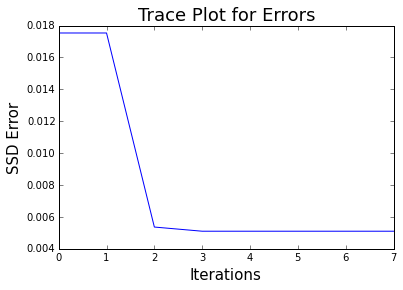

min error:  0.00510308302923
parameters at min error:  [ -4.20023090e-03  -7.69482484e-04  -1.83303454e-03  -5.76120332e-04
   8.79080873e-02   8.99983861e-05]
translation (in mm): [-0.03360185 -0.00615586 -0.01466428]
rotations (in degrees): [-0.03300926  5.03676238  0.00515653]


In [23]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'y'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(0.0, 0)],rad)
testVol2 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 0)],rad)

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 Converged in 12 iterations!


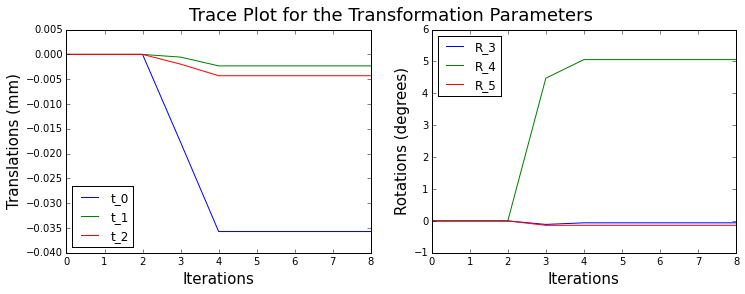

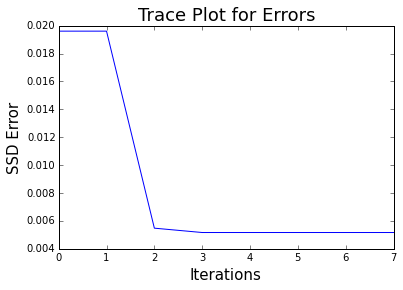

min error:  0.00516731108027
parameters at min error:  [-0.00446408 -0.00028917 -0.00053748 -0.00104202  0.08830432 -0.00239155]
translation (in mm): [-0.03571261 -0.00231339 -0.00429983]
rotations (in degrees): [-0.0597032   5.05946469 -0.1370257 ]


In [28]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'y'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(0.0, 5)],rad)
testVol2 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 5)],rad)

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 Converged in 12 iterations!


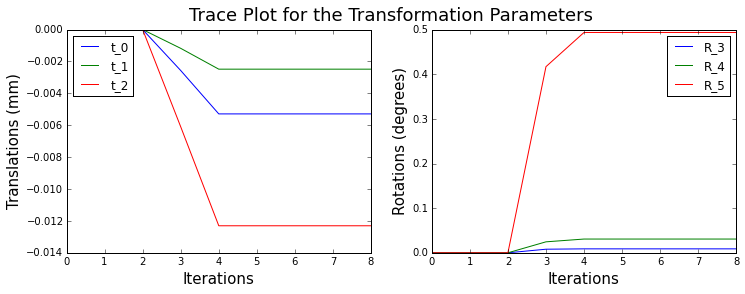

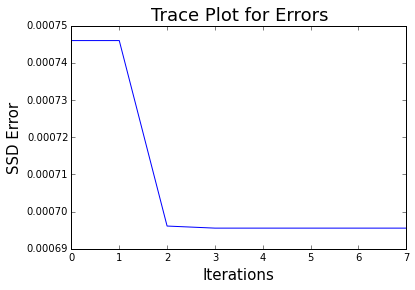

min error:  0.000695557524866
parameters at min error:  [-0.00066096 -0.00031022 -0.0015381   0.00015417  0.00053771  0.00861442]
translation (in mm): [-0.00528767 -0.00248176 -0.01230478]
rotations (in degrees): [ 0.00883351  0.03080854  0.49357007]


In [24]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'z'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.0, 0)],rad)
testVol2 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.5, 0)],rad)

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 Converged in 10 iterations!


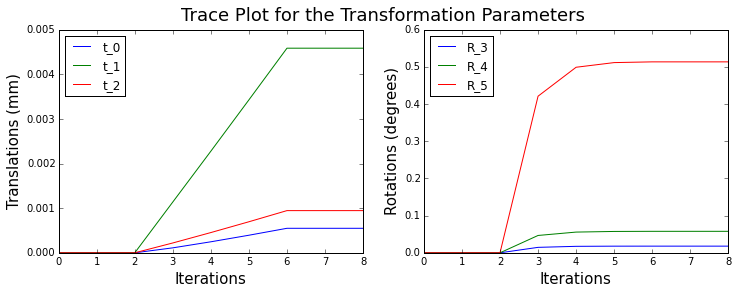

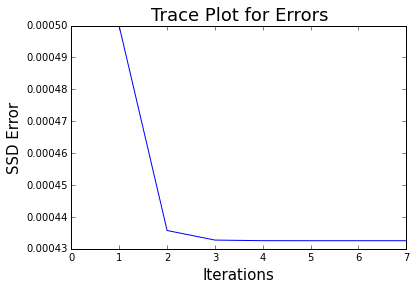

min error:  0.000432537442533
parameters at min error:  [  6.86110600e-05   5.72944076e-04   1.18129780e-04   3.12518989e-04
   1.00762765e-03   8.95817740e-03]
translation (in mm): [ 0.00054889  0.00458355  0.00094504]
rotations (in degrees): [ 0.01790602  0.05773281  0.51326576]


In [30]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'z'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.0, 5)],rad)
testVol2 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.5, 5)],rad)

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 Converged in 10 iterations!


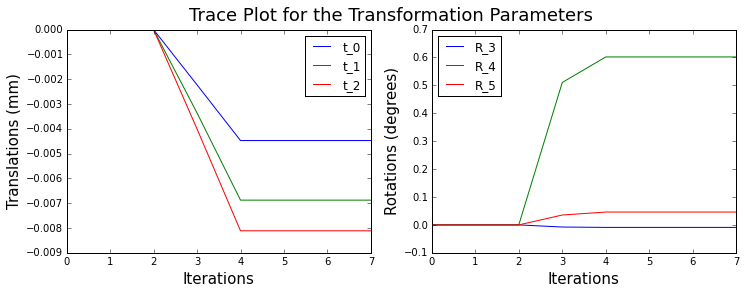

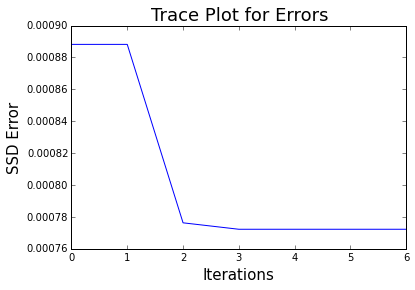

min error:  0.000772254025179
parameters at min error:  [-0.00055915 -0.00085954 -0.0010141  -0.00015686  0.01050693  0.00080368]
translation (in mm): [-0.00447322 -0.00687633 -0.00811283]
rotations (in degrees): [-0.00898758  0.60200298  0.04604733]


In [25]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'y'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.0, 0)],rad)
testVol2 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.5, 0)],rad)

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 Converged in 10 iterations!


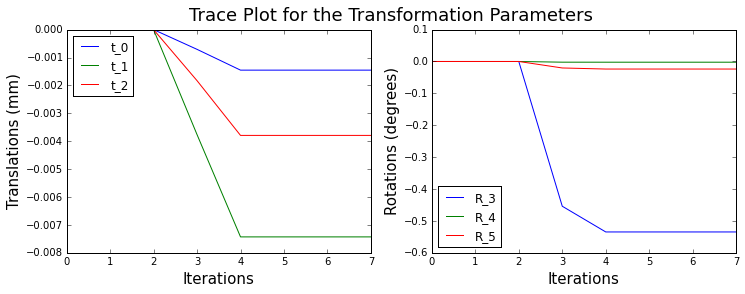

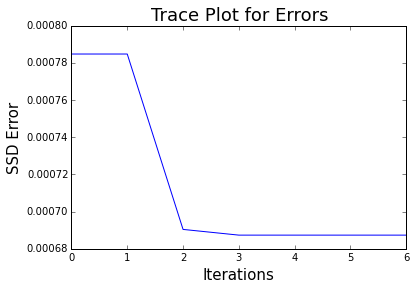

min error:  0.000687352627102
parameters at min error:  [ -1.81614525e-04  -9.28746516e-04  -4.74050624e-04  -9.33078687e-03
  -3.90735703e-05  -4.13343253e-04]
translation (in mm): [-0.00145292 -0.00742997 -0.0037924 ]
rotations (in degrees): [-0.53461471 -0.00223875 -0.02368282]


In [26]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'x'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.0, 0)],rad)
testVol2 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.5, 0)],rad)

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs)
print_results(errors, Ps, 8)

## through-plane rotation

In [51]:
from conversion import angles_from_q

0 1 2 3 4 5 6 7 8 9 10 11 12 Converged in 12 iterations!


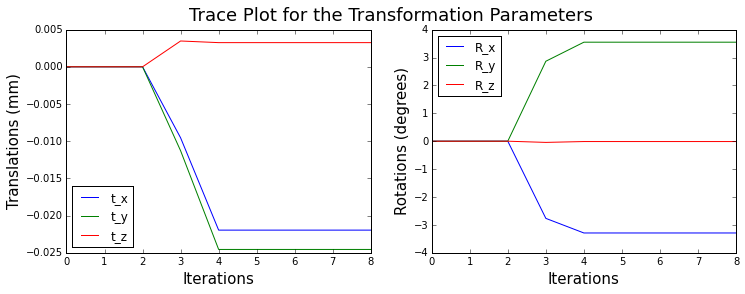

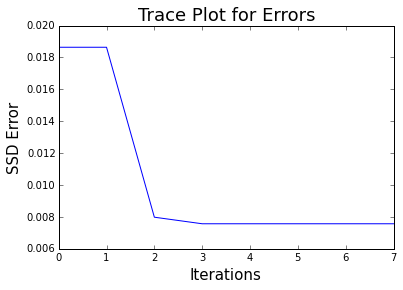

min error:  0.00757051127452
parameters at min error:  [-0.00274399 -0.0030687   0.00040611 -0.05741048  0.06193981 -0.00021522]
translation (in mm): [-0.02195195 -0.0245496   0.00324891]
rotations (in degrees): [-3.28937831  3.54888978 -0.01233105]
Compare with Ground Truth:
3.53328719463 -3.54002475736 -0.109221547992


In [58]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'xy'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(0.0, 0)],rad)
testVol2 = oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 0)]

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs,mask=True)
print_results(errors, Ps, 8)

# Get the angles from 5 degree rotation along xy
print 'Compare with Ground Truth:'
wx,wy,wz = ax_to_w(rot_ax)
beta, gamma, alpha = angles_from_q(5,wx,wy,wz)
print gamma, beta, alpha

0 1 2 3 4 5 6 7 8 9 10 11 12 Converged in 12 iterations!


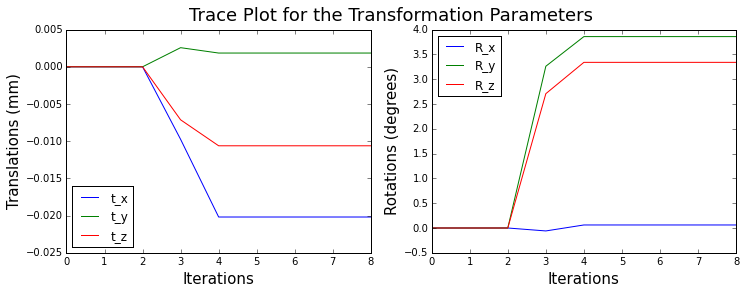

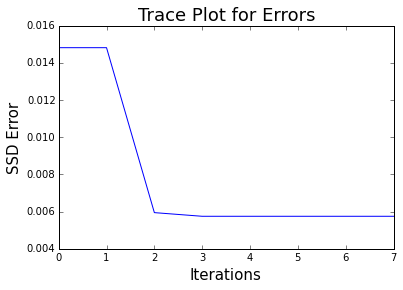

min error:  0.00574839950341
parameters at min error:  [-0.00252364  0.00023115 -0.00132711  0.00106716  0.06735204  0.05828819]
translation (in mm): [-0.02018916  0.00184917 -0.01061689]
rotations (in degrees): [ 0.06114374  3.85898737  3.33966752]
Compare with Ground Truth:
-0.109013935331 -3.53329359816 -3.53329359816


In [59]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'yz'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(0.0, 0)],rad)
testVol2 = oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 0)]

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs,mask=True)
print_results(errors, Ps, 8)

# Get the angles from 5 degree rotation along xy
print 'Compare with Ground Truth:'
wx,wy,wz = ax_to_w(rot_ax)
beta, gamma, alpha = angles_from_q(5,wx,wy,wz)
print gamma, beta, alpha

0 1 2 3 4 5 6 7 8 9 10 11 12 Converged in 12 iterations!


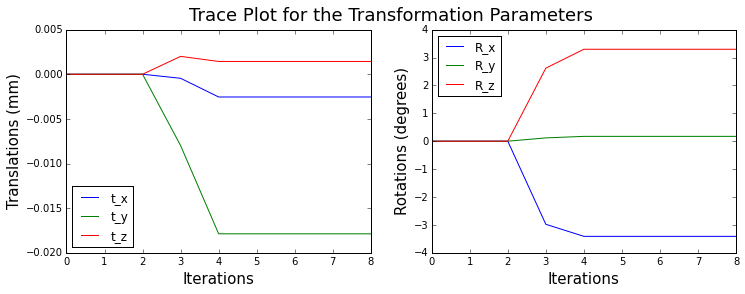

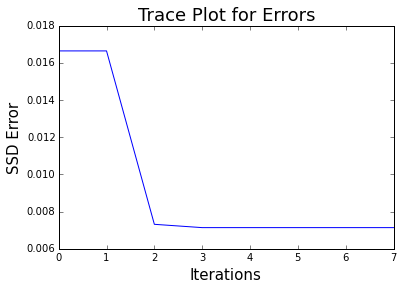

min error:  0.00713868665055
parameters at min error:  [-0.00031845 -0.00223413  0.00017905 -0.05952009  0.0030222   0.05750983]
translation (in mm): [-0.00254762 -0.01787301  0.00143238]
rotations (in degrees): [-3.41025008  0.17315956  3.29507044]
Compare with Ground Truth:
3.53328719463 -0.109221547992 -3.54002475736


In [60]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'xz'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(0.0, 0)],rad)
testVol2 = oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 0)]

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs,mask=True)
print_results(errors, Ps, 8)

# Get the angles from 5 degree rotation along xy
print 'Compare with Ground Truth:'
wx,wy,wz = ax_to_w(rot_ax)
beta, gamma, alpha = angles_from_q(5,wx,wy,wz)
print gamma, beta, alpha

# Translations Only

In [61]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'x'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.0, 0)],rad)
testVol2 = oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.0, 5)]

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

In [62]:
from Gauss_Newton import rotate_coords_transformation_m
P_s = np.array([0,0,0,0,0,0])
dest_x, dest_y, dest_z = rotate_coords_transformation_m(xx, yy, zz, P_s, ox, oy, oz)
dest = np.empty(volume_shape)
for i in xrange(volume_shape[0]):
    for j in xrange(volume_shape[1]):
        for k in xrange(volume_shape[2]):
            dest[i,j,k] = tricubic_interp(volume_shape,vol2_dervs,dest_x[i,j,k],dest_y[i,j,k],dest_z[i,j,k]) 
print cf_ssd(sphere_mask(dest,rad),testVol1)

0.0377790296752


In [63]:
P_s = np.array([0,0,5./8.,0,0,0])
dest_x, dest_y, dest_z = rotate_coords_transformation_m(xx, yy, zz, P_s, ox, oy, oz)
dest = np.empty(volume_shape)
for i in xrange(volume_shape[0]):
    for j in xrange(volume_shape[1]):
        for k in xrange(volume_shape[2]):
            dest[i,j,k] = tricubic_interp(volume_shape,vol2_dervs,dest_x[i,j,k],dest_y[i,j,k],dest_z[i,j,k]) 
print cf_ssd(sphere_mask(dest,rad),testVol1)

0.00571322351504


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Converged in 15 iterations!


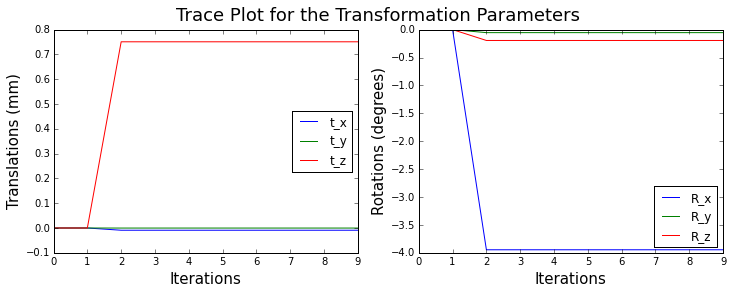

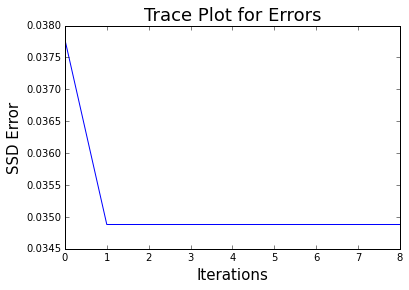

min error:  0.0348811013303
parameters at min error:  [ -1.12585871e-03  -2.95340987e-05   9.38522466e-02  -6.88668748e-02
  -9.48579404e-04  -3.40043846e-03]
translation (in mm): [ -9.00686968e-03  -2.36272790e-04   7.50817973e-01]
rotations (in degrees): [-3.94578127 -0.0543496  -0.19483077]


In [64]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'x'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.0, 0)],rad)
testVol2 = oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.0, 5)]

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs, mask=True)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 Converged in 12 iterations!


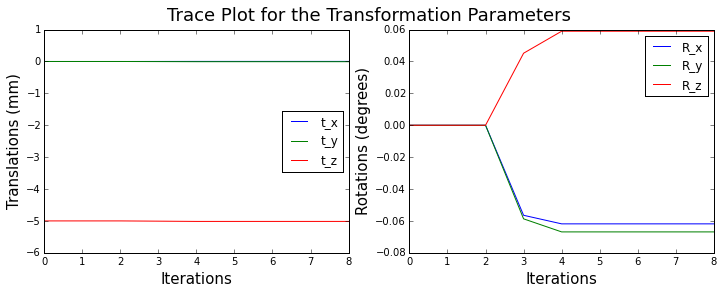

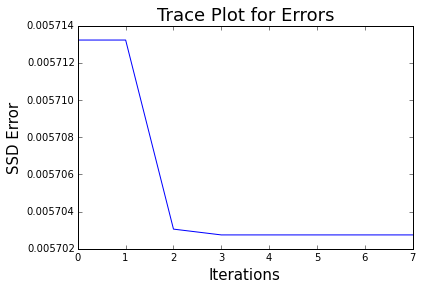

min error:  0.00570274659907
parameters at min error:  [  3.00625471e-04  -7.43003930e-04  -6.26970979e-01  -1.07939265e-03
  -1.16748407e-03   1.02946948e-03]
translation (in mm): [  2.40500377e-03  -5.94403144e-03  -5.01576783e+00]
rotations (in degrees): [-0.06184464 -0.06689191  0.05898426]


In [75]:
# Starting at solution
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'x'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.0, 0)],rad)
testVol2 = oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.0, 5)]

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

P_init = np.array([0,0,-5./8.,0,0,0])
errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs, P_initial = P_init, mask=True)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Converged in 15 iterations!


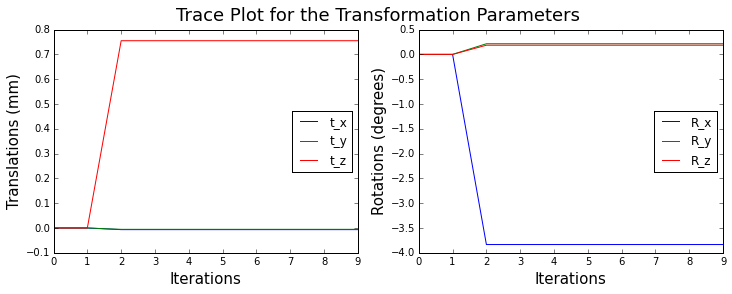

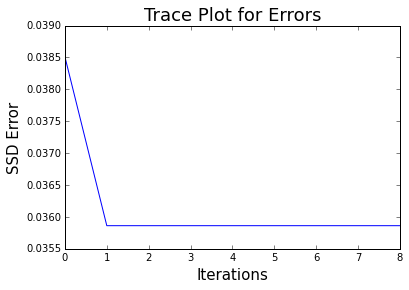

min error:  0.0358625120217
parameters at min error:  [-0.0008216  -0.00067332  0.09439731 -0.06690495  0.00375078  0.00323317]
translation (in mm): [-0.0065728  -0.00538657  0.75517851]
rotations (in degrees): [-3.83337109  0.21490389  0.1852471 ]


In [65]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'y'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.0, 0)],rad)
testVol2 = oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.0, 5)]

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs, mask=True)
print_results(errors, Ps, 8)

 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Converged in 15 iterations!


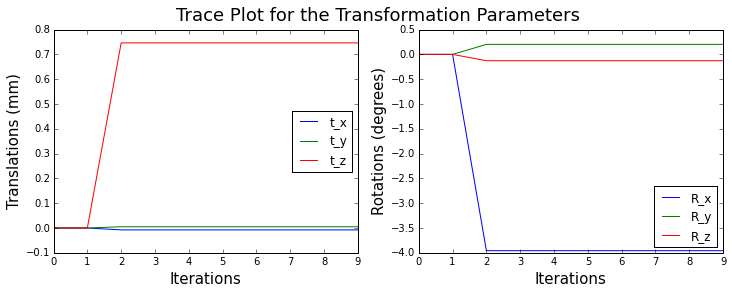

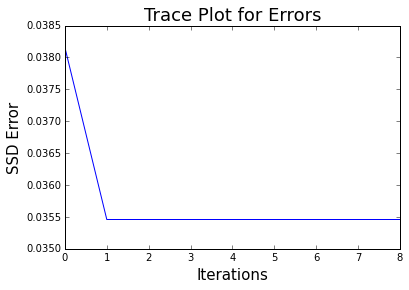

min error:  0.03545947712
parameters at min error:  [-0.00094858  0.00062872  0.09330668 -0.06907267  0.00352326 -0.00222367]
translation (in mm): [-0.00758867  0.00502972  0.74645345]
rotations (in degrees): [-3.95757275  0.20186801 -0.1274068 ]


In [67]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'z'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.0, 0)],rad)
testVol2 = oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.0, 5)]

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs,mask=True)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Converged in 15 iterations!


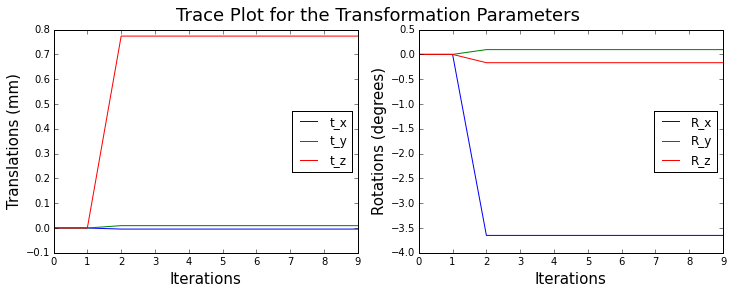

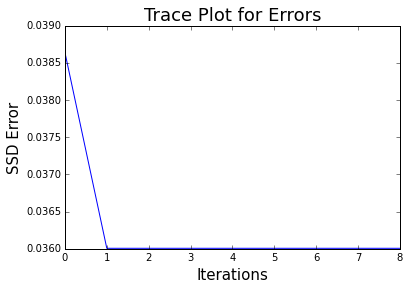

min error:  0.0360068628259
parameters at min error:  [-0.00053866  0.00118271  0.09672708 -0.06369454  0.00168451 -0.00291911]
translation (in mm): [-0.0043093   0.00946171  0.77381661]
rotations (in degrees): [-3.64942811  0.09651543 -0.16725282]


In [68]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'z'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(2.5, 0)],rad)
testVol2 = oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(2.5, 5)]

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs,mask=True)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Converged in 15 iterations!


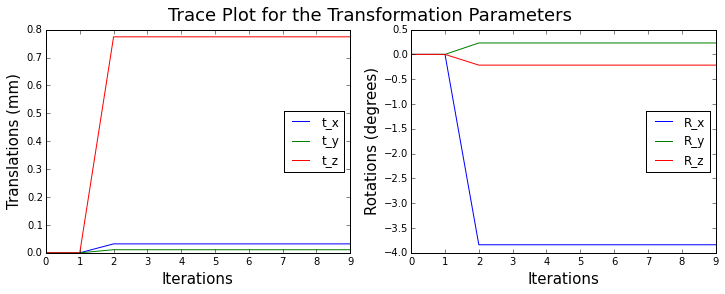

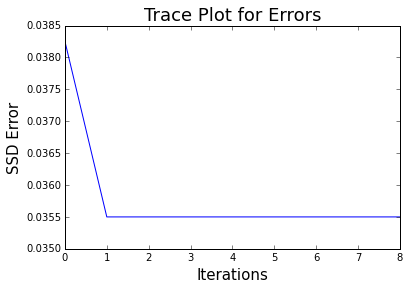

min error:  0.0354999576148
parameters at min error:  [ 0.00399909  0.00137709  0.09675871 -0.06698644  0.00402312 -0.00377206]
translation (in mm): [ 0.03199271  0.01101675  0.77406967]
rotations (in degrees): [-3.83804012  0.2305077  -0.21612303]


In [69]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'y'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(2.5, 0)],rad)
testVol2 = oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(2.5, 5)]

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs,mask=True)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Converged in 15 iterations!


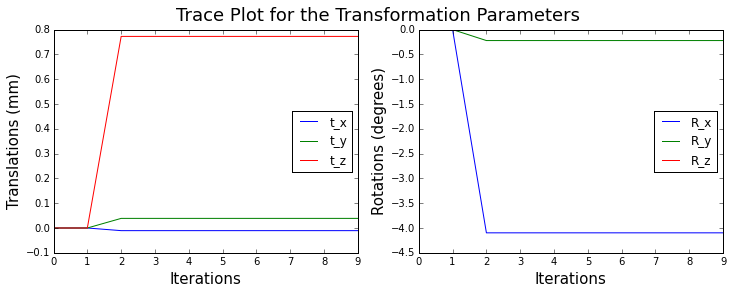

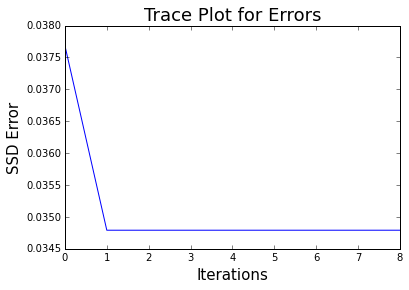

min error:  0.0347914197314
parameters at min error:  [-0.00133222  0.00484803  0.09656888 -0.07151518 -0.00385447 -0.00029189]
translation (in mm): [-0.01065772  0.03878423  0.77255102]
rotations (in degrees): [-4.09751798 -0.2208448  -0.01672394]


In [70]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'x'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(2.5, 0)],rad)
testVol2 = oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(2.5, 5)]

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs,mask=True)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Converged in 15 iterations!


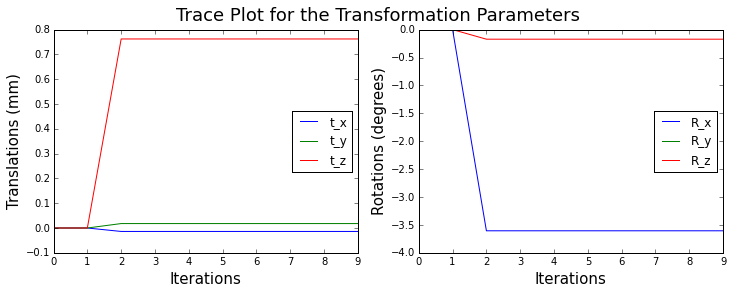

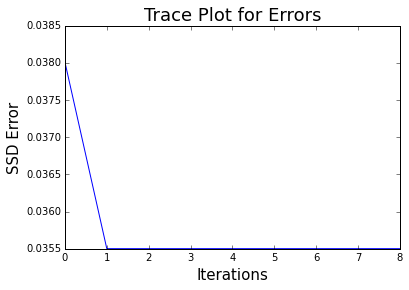

min error:  0.0355019085997
parameters at min error:  [ -1.73759300e-03   2.23540235e-03   9.52806184e-02  -6.29292379e-02
  -7.20205726e-06  -2.99885420e-03]
translation (in mm): [-0.01390074  0.01788322  0.76224495]
rotations (in degrees): [ -3.60557974e+00  -4.12647485e-04  -1.71821689e-01]


In [71]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'z'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 0)],rad)
testVol2 = oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 5)]

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs,mask=True)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Converged in 15 iterations!


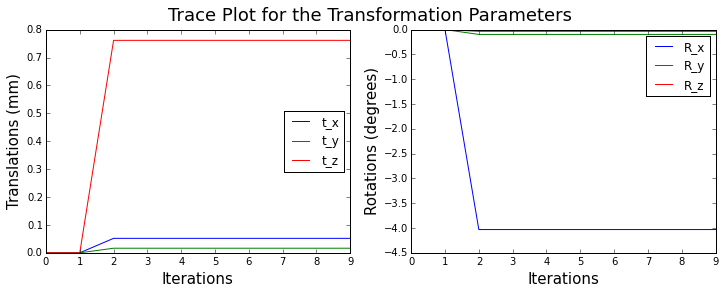

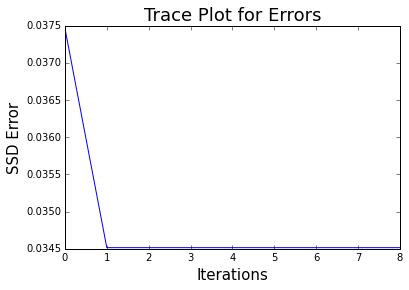

min error:  0.0345152992563
parameters at min error:  [ 0.00647725  0.00205171  0.09517982 -0.07035526 -0.0016981  -0.0006153 ]
translation (in mm): [ 0.051818    0.01641368  0.76143859]
rotations (in degrees): [-4.0310593  -0.09729393 -0.035254  ]


In [72]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'y'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 0)],rad)
testVol2 = oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 5)]

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs,mask=True)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Converged in 15 iterations!


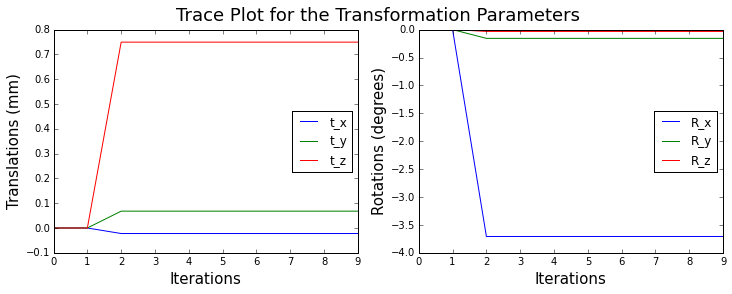

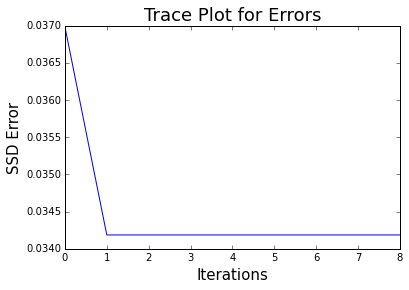

min error:  0.034186241569
parameters at min error:  [-0.00278053  0.00849374  0.09368193 -0.06470929 -0.00274127 -0.00057073]
translation (in mm): [-0.02224428  0.06794993  0.74945544]
rotations (in degrees): [-3.70756898 -0.15706314 -0.03270018]


In [73]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'x'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 0)],rad)
testVol2 = oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 5)]

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs,mask=True)
print_results(errors, Ps, 8)